In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('data/2330.csv')
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,MA5,MA10,DIF,MACD9,OSC,K,D
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,59446,55917,-1.15,-1.00,-0.15,32.35%,26.05%
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,55219,54470,-1.04,-1.01,-0.03,46.77%,32.96%
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,45044,52998,-0.88,-0.98,0.10,60.35%,42.09%
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,44443,51283,-0.76,-0.94,0.18,69.40%,51.19%
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,43583,52599,-0.54,-0.86,0.32,79.60%,60.66%


In [3]:
df.tail()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,MA5,MA10,DIF,MACD9,OSC,K,D
1656,2018/4/11,246.5,248.5,246.5,248.0,245.8,246.25,249.45,247.78,21778,27471,25541,-0.61,-0.21,-0.40,50.43%,39.72%
1657,2018/4/12,248.5,248.5,244.0,245.0,245.5,245.65,248.75,247.86,20477,27761,24478,-0.67,-0.30,-0.37,46.95%,42.13%
1658,2018/4/13,246.0,246.0,244.0,244.5,245.6,245.60,248.13,247.90,19947,24587,23481,-0.78,-0.39,-0.38,42.41%,42.22%
1659,2018/4/16,243.0,244.0,242.0,243.5,245.3,245.55,247.55,247.93,21609,21816,21999,-0.97,-0.51,-0.46,35.42%,39.95%
1660,2018/4/17,243.0,243.5,237.5,238.0,243.8,244.75,246.70,247.95,42756,25313,24575,-1.43,-0.70,-0.74,25.06%,34.99%


In [4]:
del df['Date']
del df['DIF']
del df['K']
del df['D']
del df['MACD9']
del df['OSC']

In [5]:
del df['MA5']
del df['MA10']
del df['SMA10']
del df['SMA20']
del df['SMA60']

In [6]:
df.tail()

,Open,High,Low,Close,SMA5,Vol
1656,246.5,248.5,246.5,248.0,245.8,21778
1657,248.5,248.5,244.0,245.0,245.5,20477
1658,246.0,246.0,244.0,244.5,245.6,19947
1659,243.0,244.0,242.0,243.5,245.3,21609
1660,243.0,243.5,237.5,238.0,243.8,42756


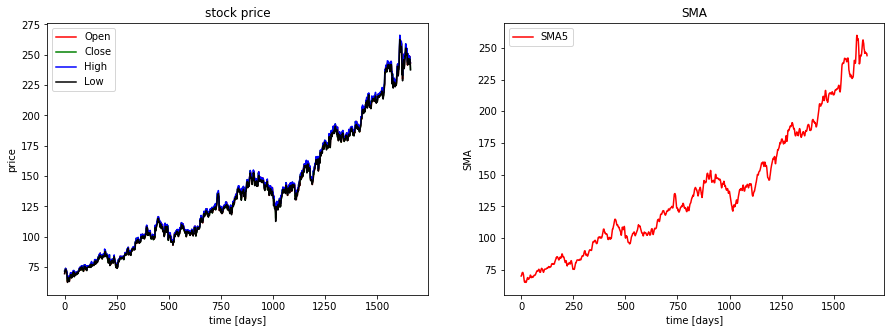

In [7]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(df.Open.values , color='red', label='Open')
plt.plot(df.Close.values , color='green', label='Close')
plt.plot(df.High.values , color='blue', label='High')
plt.plot(df.Low.values , color='black', label='Low')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')



plt.subplot(1,2,2);
plt.plot(df.SMA5.values , color='red', label='SMA5')
#plt.plot(df.SMA10.values , color='red', label='SMA10')
#plt.plot(df.SMA20.values , color='red', label='SMA20')
plt.title('SMA')
plt.xlabel('time [days]')
plt.ylabel('SMA')
plt.legend(loc='best');



/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


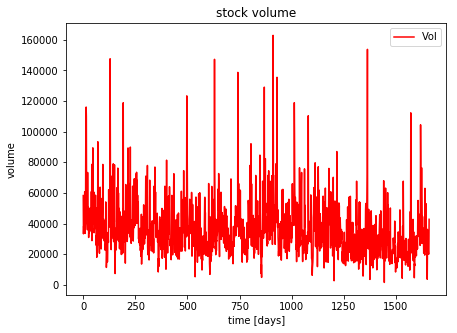

In [8]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.subplot(1,2,1);
plt.plot(df.Vol.values , color='red', label='Vol')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [9]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [10]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1, 1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1, 1))
    df['Low']  = min_max_scaler.fit_transform(df.Low.values.reshape(-1, 1))
    df['Close']= min_max_scaler.fit_transform(df.Close.values.reshape(-1, 1))
    df['SMA5'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1, 1))
    df['Vol']  = min_max_scaler.fit_transform(df.Close.values.reshape(-1, 1))
    return df

def load_data(stock, seq_len):
    data_raw = stock.as_matrix()
    data = []
    
    for i in range(len(data_raw) - seq_len):
        data.append(data_raw[i : i+seq_len])
        
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100 * data.shape[0]));
    test_set_size  = int(np.round(test_set_size_percentage/100 * data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size, :-1 , : ]
    y_train = data[:train_set_size, -1 , :]


    x_valid = data[train_set_size:train_set_size + valid_set_size,:-1 , :]
    y_valid = data[train_set_size:train_set_size + valid_set_size, -1 , :]


    x_test = data[train_set_size + valid_set_size:,:-1, :]
    y_test = data[train_set_size + valid_set_size:, -1, :]
    
    return[x_train , y_train, x_valid, y_valid, x_test, y_test]


cols = list(df.columns.values)
print('df.columns.values = ' , cols)

df_norm = df.copy()
df_norm = normalize_data(df_norm)


seq_len = 20

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_norm, seq_len)
print('x_train.shape = ' ,x_train.shape)
print('y_train.shape = ' ,y_train.shape)
print('x_valid.shape = ' ,x_valid.shape)
print('y_valid.shape = ' ,y_valid.shape)
print('x_test.shape = ' ,x_test.shape)
print('x_test.shape = ' ,x_test.shape)

df.columns.values =  ['Open', 'High', 'Low', 'Close', 'SMA5', 'Vol']
x_train.shape =  (1313, 19, 6)
y_train.shape =  (1313, 6)
x_valid.shape =  (164, 19, 6)
y_valid.shape =  (164, 6)
x_test.shape =  (164, 19, 6)
x_test.shape =  (164, 19, 6)


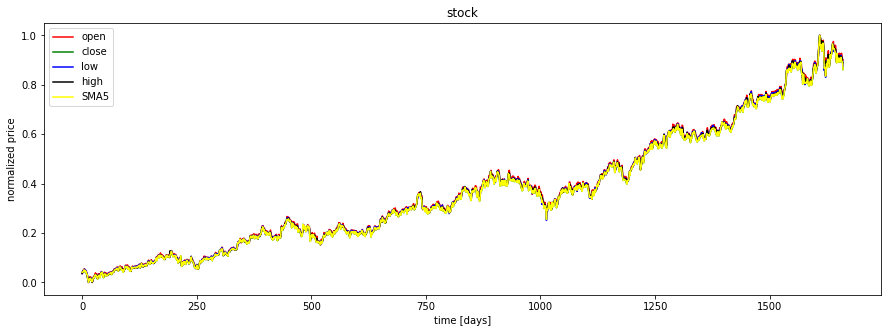

In [11]:
plt.figure(figsize=(15,5));
plt.plot(df_norm.Open.values, color='red', label='open')
plt.plot(df_norm.Close.values, color='green', label='close')
plt.plot(df_norm.Low.values, color='blue', label='low')
plt.plot(df_norm.High.values, color='black', label='high')
plt.plot(df_norm.SMA5.values, color='yellow', label='SMA5')


plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()

In [14]:
i_in_epoch = 0;
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)


def get_next_batch(batch_size):
    global i_in_epoch, x_train, perm_array
    start = i_in_epoch
    i_in_epoch += batch_size
    
    if i_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)
        start = 0
        i_in_epoch
        
    end = i_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]


n_steps    = seq_len-1
n_inputs   = 6
n_neurons  = 200
n_outputs  = 6
n_layers   = 2
learning_rate   = 0.001
batch_size = 50
n_epochs   = 100
train_set_size = x_train.shape[0]
test_set_size  = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs],name='p1')
y = tf.placeholder(tf.float32, [None, 6],name='p2')


layers = [tf.contrib.rnn.BasicRNNCell(num_units = n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states =tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:]

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs * train_set_size/ batch_size)):
        x_batch , y_batch = get_next_batch(batch_size)
        sess.run(training_op , feed_dict={X : x_batch , y: y_batch})
        if iteration % int(5 * train_set_size / batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            
            print('epochs: Mse train/valid = ',(iteration*batch_size/train_set_size, mse_train, mse_valid))
    

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred  = sess.run(outputs, feed_dict={X: x_test})









epochs: Mse train/valid =  (0.0, 0.023218226, 0.12572724)


ResourceExhaustedError: OOM when allocating tensor with shape[1313,200] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/concat, rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/MatMul/Enter)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-adb8b4069553>", line 41, in <module>
    rnn_outputs, states =tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn.py", line 635, in dynamic_rnn
    dtype=dtype)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn.py", line 832, in _dynamic_rnn_loop
    swap_memory=swap_memory)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 3202, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 2940, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 2877, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 3178, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn.py", line 803, in _time_step
    (output, new_state) = call_cell()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn.py", line 789, in <lambda>
    call_cell = lambda: cell(input_t, state)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py", line 191, in __call__
    return super(RNNCell, self).__call__(inputs, state)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/layers/base.py", line 714, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py", line 1242, in call
    cur_inp, new_state = cell(cur_inp, cur_state)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py", line 298, in __call__
    *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/layers/base.py", line 714, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py", line 353, in call
    array_ops.concat([inputs, state], 1), self._kernel)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py", line 2108, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 4209, in mat_mul
    name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1313,200] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/concat, rnn/while/rnn/multi_rnn_cell/cell_1/basic_rnn_cell/MatMul/Enter)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

